# List of recent changes and associated observations

*   Aug 29, 2023:


1.   Plots are used to verify the distrubtion of the data across different folds and everything was found ok. See the Code Section "Plot the training and tesing data under different folds".
2.   Validation data was not used during the training. The results became more robust. Six different index-sets were used and the f1-scores across the 3 classes were pretty consistent. So, skipping the validation during the training actually improved the results. This may be due to availability of more data for training as we are NOT keeping aside some data for validation.
3.  Results got worse if Epcoh is increased from 100 to 200. This may happed due to Overfitting effect.





**Prepare packages**

In [ ]:
!pip install mat73
# !pip install git+https://github.com/nickkunz/smogn.git

In [ ]:
# import smogn
import random as rn
from scipy.io import loadmat
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import datasets, layers, models, regularizers
from sklearn.model_selection import train_test_split
import numpy as np
import mat73
from numpy.random import seed
import os

seed = 40
rn.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

**Set directory**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Git/WIP_NoteBooks
# %cd /content/gdrive/MyDrive/Colab Notebooks

Mounted at /content/gdrive
/content/gdrive/MyDrive/Git/WIP_NoteBooks


# Import input data created by MATLAB

In [ ]:
# data_features = mat73.loadmat('X_train_python_features_collection.mat')
data_features = mat73.loadmat('X_train_python_features_collection_AfterSortingCorrection_Pooled_Mar2023.mat')
data_features.keys()

dict_keys(['X_train_python_features_collection'])

In [ ]:
X_features = data_features['X_train_python_features_collection']

**Normalize the data within 0 to 1**

In [ ]:
normalized_features = np.zeros(X_features.shape)

for i in range(X_features.shape[-1]):
    feature = X_features[..., i]
    min_val = np.min(feature)
    # print(min_val)
    max_val = np.max(feature)
    # print(max_val)
    normalized_feature = (feature - min_val) / (max_val - min_val)
    normalized_features[..., i] = normalized_feature
X_features = normalized_features

In [ ]:
X_features.shape

(240, 5, 30, 8)

In [ ]:
tabular_data = X_features[201][0]
df = pd.DataFrame(tabular_data, columns = ['max_temp', 'mean_temp', 'points_above_350threshold', \
                                           'num_peaks', 'cooling_time', 'abs_cooling_rate_1', 'abs_cooling_rate_2_scaled', 'Exp2_rsquare'])
df

,max_temp,mean_temp,points_above_350threshold,num_peaks,cooling_time,abs_cooling_rate_1,abs_cooling_rate_2_scaled,Exp2_rsquare
0,0.443886,0.966825,0.000000,0.058824,0.120381,0.011646,0.000312,0.932185
1,0.554439,0.972113,0.000000,0.117647,0.537545,0.000516,0.000138,0.914669
2,0.705193,0.976649,0.103448,0.176471,0.615018,0.000542,0.002439,0.898493
3,0.740369,0.973925,0.103448,0.117647,0.442193,0.000881,0.001896,0.867718
4,0.688442,0.970296,0.068966,0.117647,0.213349,0.001705,0.000903,0.792941
5,0.676717,0.969652,0.057471,0.117647,0.141836,0.001924,0.000772,0.729938
6,0.656616,0.969361,0.045977,0.117647,0.125149,0.001561,0.000289,0.663672
7,0.614740,0.969328,0.022989,0.117647,0.115614,0.001349,0.000874,0.637954
8,0.574539,0.969468,0.000000,0.117647,0.058403,0.004172,0.000304,0.994235
9,0.582915,0.969346,0.000000,0.117647,0.104887,0.001309,0.001115,0.640793


**Plot sample data**

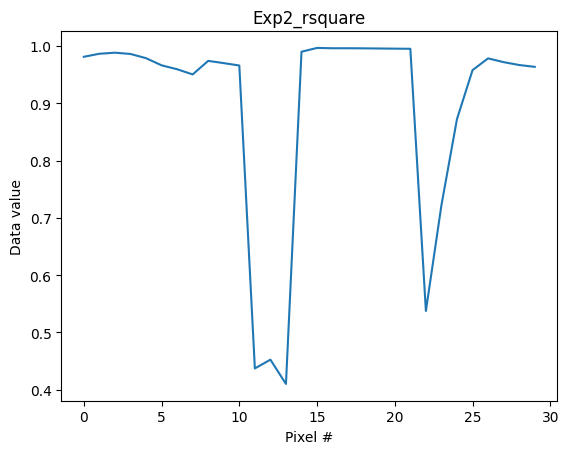

In [ ]:
data_index = 7
columns = ['max_temp', 'mean_temp', 'points_above_threshold', \
'num_peaks', 'cooling_time', 'abs_cooling_rate_1', 'abs_cooling_rate_2_scaled', 'Exp2_rsquare']
plt.plot(X_features[5,2,:,data_index])
plt.xlabel('Pixel #')
plt.ylabel(f'Data value')
plt.title(f'{columns[data_index]}')
plt.show()

# Select Features to be used

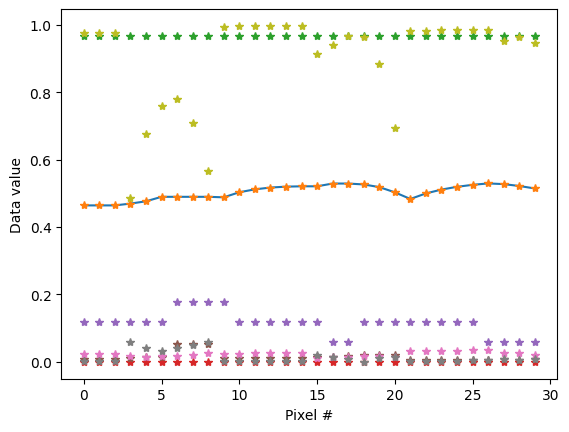

(240, 5, 30, 8)

In [ ]:
X_features_trimmed = X_features # [:,:,:,[0,4,5]] [:,:,:,[0,2,3,4,5,7]]
plt.plot(X_features[0,2,:,0])
plt.plot(X_features_trimmed[0,2,:],'*')
plt.xlabel('Pixel #')
plt.ylabel(f'Data value')
plt.show()
X_features_trimmed.shape

# Helper Functions

In [ ]:
def classification_results(string):
  list_of_strings = string.split(" ")
  filtered_string = []
  for i in list_of_strings:
    if i == '': continue
    else:
      try:
        filtered_string.append(float(i))
      except:
        continue
  classwise_results = np.array(filtered_string[0:15]).reshape(3,5)
  # f1score =  filtered_string[19]
  return classwise_results #, f1score

def prediction_results(cnn,X_test,y_test,X_train,y_train):
  test_predictions = cnn.predict(X_test)
  train_predictions = cnn.predict(X_train)

  predictionError = y_test - test_predictions;
  squares = predictionError**2;
  rmse = np.sqrt(np.mean(squares))
  rmse_wrt_range = rmse/(np.max(y_test)-np.min(y_test))
  rmse_wrt_mean = rmse/np.mean(y_test)

  print('For Test data--->\nRMSE: {}\nRange: {}\nRMSE_wrt_Range: {}\nMean: {}\nRMSE_wrt_Mean: {}'.\
        format(rmse,np.max(y_test)-np.min(y_test),rmse_wrt_range,np.mean(y_test),rmse_wrt_mean))

  predictionError = y_train - train_predictions;
  squares = predictionError**2;
  rmse = np.sqrt(np.mean(squares))
  rmse_wrt_range = rmse/(np.max(y_train)-np.min(y_train))
  rmse_wrt_mean = rmse/np.mean(y_train)

  print('\nFor Train data--->\nRMSE: {}\nRange: {}\nRMSE_wrt_Range: {}\nMean: {}\nRMSE_wrt_Mean: {}'.\
        format(rmse,np.max(y_train)-np.min(y_train),rmse_wrt_range,np.mean(y_train),rmse_wrt_mean))

  data_max = max(np.max(test_predictions), np.max(y_test),np.max(train_predictions), np.max(y_train))
  plt.plot(train_predictions,y_train,'b.')
  plt.plot(test_predictions,y_test,'r.')
  plt.legend(['test','train'])
  plt.plot([0,data_max],[0,data_max])
  plt.show()

def training_history_with_validation(training):
  plt.plot(training.history['loss'])
  plt.plot(training.history['val_loss'])
  plt.ylabel('loss')
  # plt.plot(training.history['root_mean_squared_error'])
  # plt.plot(training.history['val_root_mean_squared_error'])
  # plt.ylabel('root_mean_squared_error')
  plt.xlabel('epoch' )
  plt.legend(['train','dev'])
  plt.show()

def training_history(training):
  plt.plot(training.history['loss'])
  plt.ylabel('loss')
  # plt.plot(training.history['root_mean_squared_error'])
  # plt.ylabel('root_mean_squared_error')
  plt.xlabel('epoch' )
  plt.legend(['train'])
  plt.show()

# def plot_fitting_history(history,filename,dpi):
def plot_fitting_history(history):
  epochs = len(history.history['loss'])
  epoch_data = np.arange(1,epochs+1)
  plt.plot(epoch_data,history.history['loss'],'o-')
  plt.ylabel('Loss')
  plt.xlabel('Epoch sequence' )
  if epochs > 100: plt.xticks(np.arange(0, epochs + 1, step=int(epochs/100)*10))
  else: plt.xticks(np.arange(0, epochs + 1, step=5))
  if 'val_loss' in history.history.keys():
    plt.plot(epoch_data,history.history['val_loss'],'o--')
    plt.legend(['Training','Validation'])
  else:
    plt.legend(['Training'])
  # plt.savefig(filename, dpi=dpi)
  plt.show()

def accuracy_measure(predictions, true_value, percentage):
  scores = []
  for p,t in zip(predictions,true_value):
    if abs(p-t) < t*percentage:
      scores.append(1)
  print('Accuracy: {}% out of {} items'.format(round(sum(scores)/predictions.shape[0]*100,2), predictions.shape[0]))
  return round(sum(scores)/predictions.shape[0],4)

def combined_prediction_results(test_predictions,y_test):
  predictionError = y_test - test_predictions;
  squares = predictionError**2;
  rmse = np.sqrt(np.mean(squares))
  rmse_wrt_range = rmse/(np.max(y_test)-np.min(y_test))
  rmse_wrt_mean = rmse/np.mean(y_test)

  print('RMSE: {}\nRange: {}\nRMSE_wrt_Range: {}\nMean: {}\nRMSE_wrt_Mean: {}'.\
        format(rmse,np.max(y_test)-np.min(y_test),rmse_wrt_range,np.mean(y_test),rmse_wrt_mean))

def combined_predictions_4Folds(X,Classifier_model,Q1_model,Q2_model,Q3_model,Q4_model):
  y_test_pred = Classifier_model.predict(X)
  Q1_test_predictions = Q1_model.predict(X)
  Q2_test_predictions = Q2_model.predict(X)
  Q3_test_predictions = Q3_model.predict(X)
  Q4_test_predictions = Q4_model.predict(X)
  Q_test_predictions = np.concatenate((Q1_test_predictions,Q2_test_predictions,Q3_test_predictions,Q4_test_predictions), axis = 1)
  combined_test_predictions1 = np.sum(np.multiply(Q_test_predictions,y_test_pred), axis = 1)
  combined_test_predictions2 = np.sum(np.multiply(Q_test_predictions,np.round(y_test_pred,0)), axis = 1)

  return combined_test_predictions1, combined_test_predictions2

def combined_predictions_2Folds(X,Classifier_model,Q1Q2_model,Q3Q4_model):
  y_test_pred = Classifier_model.predict(X)
  Q1Q2_test_predictions = Q1Q2_model.predict(X)
  Q3Q4_test_predictions = Q3Q4_model.predict(X)
  Q_test_predictions = np.concatenate((Q1Q2_test_predictions,Q3Q4_test_predictions), axis = 1)
  combined_test_predictions1 = np.sum(np.multiply(Q_test_predictions,y_test_pred), axis = 1)
  combined_test_predictions2 = np.sum(np.multiply(Q_test_predictions,np.round(y_test_pred,0)), axis = 1)

  return combined_test_predictions1, combined_test_predictions2

# Import the porosity level (pore diameter) values

In [ ]:
pore_data = pd.read_csv('In718 Sample Information.csv')
pore_data.head()

,Sample ID,Mean Pore Area,Max Pore Area,Mean Pore Diameter,Max Pore Diameter
0,11,160.326667,720.12,14.165000,50.84
1,11,152.263333,424.55,19.286667,49.94
2,11,736.916250,2310.84,33.493750,79.23
3,11,77.027778,397.68,9.653333,37.45
4,11,1187.662000,4890.37,49.544000,171.04


**Crucial Step: Select the desired porosity level 🔔**


---



In [ ]:
# ===============================
# ==================================================
# ==========================================================================
selected_porosity_level = pore_data['Max Pore Diameter'].to_numpy() # Crucial Step
# ==========================================================================
# ==================================================
# ===============================
y = selected_porosity_level.reshape(240,1)
y.shape

(240, 1)

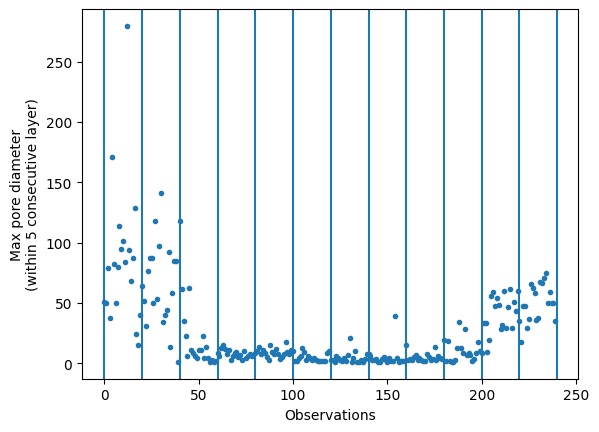

In [ ]:
plt.plot(y,'.')
for i in np.linspace(0,240,13):
  plt.axvline(i)
plt.xlabel('Observations')
plt.ylabel('Max pore diameter\n(within 5 consecutive layer)')
plt.show()

# k-fold preparation

[ 69 196 100 221  11  35  37 206 111 102  97  59  46 145  29  42 125 182
 210 146 118 162 191 218 225 167 183  18 121 148  54  65 213 168 132 194
   5  33 112 147  86 197 149 123 170  23 160  26 189 238 129 216 212  62
 126 230 127 164  89 200 217 228 157 229  28 150 120 188 142 109 176  75
 190 166  64 144 227  81  24  93 209 130 113 172  40  52 169  77  10 143
 203 134  67 136 198  38   0  53  48  96 151 140  13  17  56  25  39 137
   9   2 177  90 152  85  66 204   6 105   4  79  15   3  16  68  43 155
 185 103 192 208  58 154 122 107 139  88 220 116  61 138 237  45  76 233
 124  47 205  78 106 224  20 234  51  32 175 235  94  21 173  27 115 119
 232 223  82  84 231 214  34 201  72 161   1 128  63 101  36  83 179  57
 239  98 153 110 117  95 215  41 135  80 133 108  31 163 171  87 174  44
  60  30 195 178 236 141 156 226 199  99 131  22 202 186 104  92  14 207
 158 180   8 222 181  49  73  91 187 211  55  74 159  19 114  71  12 193
  50 184 165   7 219  70]


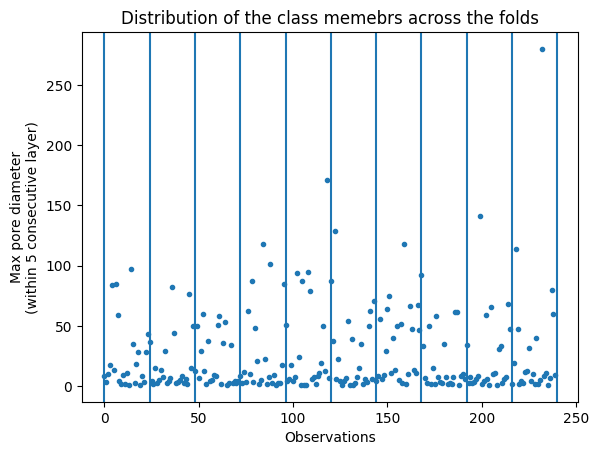

In [ ]:
indexes = np.random.permutation(240)
# indexes = np.array([157, 235,  96, 213, 172, 135, 210, 113, 233,  75,  50,  47,  78,
#         62,  21, 141, 194, 219, 209,  95, 184,  90, 185,  98,  12, 236,
#         42,  15, 107, 134, 179, 191,  40, 231, 183, 229,  10,  82, 170,
#        222, 100,   1, 232, 171, 186, 211,  19, 125, 230, 165,  77,  76,
#        148, 104, 175, 205, 228, 132,  57,  37, 188, 216, 137,  54, 193,
#         86, 119, 153,  23,  56, 156,  60, 234,  71,   6, 130, 237,   7,
#        204, 124, 118,  38, 154, 127, 180, 161, 177, 182, 192, 115, 208,
#         59,  48, 102,  70,  65, 144, 139, 155,  55, 174, 142, 121, 207,
#        109, 212, 169, 159,  99, 238, 163,  49, 110,  52,  74,  26,  45,
#        226, 227,   4,  11,  53, 147,  79,   8, 214,   5, 143, 224, 166,
#        122,  22,  68,  20, 160,  14,  32, 195,  64, 152, 201,  81,  58,
#         13, 187,  72,  87, 123, 164, 196, 206,  51, 198,  24,  94, 106,
#         16,  63, 128, 105,  28,  73,  89, 149,  93, 239,  83,  43,  92,
#         18, 145, 158, 150,  39, 225, 223, 200, 111,  66, 117, 221, 140,
#        101,  69,   2,  84,  17, 146, 217,  29,  30, 114, 202, 103,  67,
#         25, 176, 215, 116, 168,  91, 120,  35, 112, 129, 189, 136, 190,
#         80, 181, 126, 197, 220, 203,   0,  36, 133,  33,  88, 162,  34,
#         44,  97,  85,  61, 167, 199, 173,  27, 138,   9,  31,   3, 108,
#        178, 218,  46, 131, 151,  41])

''' Worst result from the following indexes
indexes = [200 151 157 118 149 221 105  58  44 148  90 150 212  47 182 231  57  67
  68   8  33  79  54 112 117 110 100 113 230  41  19  30  20   3 191  11
  66   9  53  69 197 124  99 222  18  23 195  35  63   6 189 164  21 165
 140  64 169 130 116  92 180   1  34  38  39 152 184 194  95 190  74 163
 106 201 213 129 114 174 128  77 107 235  82  70 203   0 179 155 147 210
 204 234 115  75  25  42 134 186  15 207 226  13 139  27 205 166  40 171
 145 209 229  48  24  50  37 126 138  16 208  65  80 237 227  71  98 103
 136 141  12  31  49 185 131 127 232  36  91  96 121  78  83 111 146  89
 219 132  26  55   7 161 101  93  85 192 177   2 214 173 168  46  97 156
 199 167 188 218  14 175 108 172  94 159  73  72 216 160 223 236  88 122
 239 154 123   4 206  51 215 162  87  32  52 119 143 135 104 193  56 125
 120 176 220 233 158 187  43  10 217  86 178 183  84 133 202  28 198  29
  81 181 228 109 142 153  60 196 238  59 144 170  61  76   5 137 102 225
  22  62 224  45  17 211]
'''

print(indexes)

y_shuffled = y[indexes]
plt.plot(y_shuffled,'.')
for i in np.linspace(0,240,11):
  plt.axvline(i)
plt.xlabel('Observations')
plt.ylabel('Max pore diameter\n(within 5 consecutive layer)')
plt.title('Distribution of the class memebrs across the folds')
plt.show()
# indexes

**Prepare dictionaries for testing-folds**

In [ ]:
test_indexes_dictionary = {}
counter = 1
for i in np.arange(0,240,24):
  i = int(i)
  key_name = 'test_data_' + str(counter) + '_indexes'
  test_indexes_dictionary.update({key_name: indexes[i:i+24]})
  counter = counter + 1

In [ ]:
test_indexes_dictionary.keys()

dict_keys(['test_data_1_indexes', 'test_data_2_indexes', 'test_data_3_indexes', 'test_data_4_indexes', 'test_data_5_indexes', 'test_data_6_indexes', 'test_data_7_indexes', 'test_data_8_indexes', 'test_data_9_indexes', 'test_data_10_indexes'])

In [ ]:
test_indexes_dictionary['test_data_1_indexes'], \
test_indexes_dictionary['test_data_2_indexes'], \
test_indexes_dictionary['test_data_3_indexes'], \
test_indexes_dictionary['test_data_4_indexes'],

(array([ 69, 196, 100, 221,  11,  35,  37, 206, 111, 102,  97,  59,  46,
        145,  29,  42, 125, 182, 210, 146, 118, 162, 191, 218]),
 array([225, 167, 183,  18, 121, 148,  54,  65, 213, 168, 132, 194,   5,
         33, 112, 147,  86, 197, 149, 123, 170,  23, 160,  26]),
 array([189, 238, 129, 216, 212,  62, 126, 230, 127, 164,  89, 200, 217,
        228, 157, 229,  28, 150, 120, 188, 142, 109, 176,  75]),
 array([190, 166,  64, 144, 227,  81,  24,  93, 209, 130, 113, 172,  40,
         52, 169,  77,  10, 143, 203, 134,  67, 136, 198,  38]))

In [ ]:
list_of_y = []
for id in test_indexes_dictionary['test_data_1_indexes']:
  if y[id]>25: list_of_y.append((np.squeeze(y[id]),id))
sorted(list_of_y)

[(array(28.22), 191),
 (array(28.71), 210),
 (array(34.63), 42),
 (array(43.58), 218),
 (array(59.09), 206),
 (array(84.), 11),
 (array(85.09), 37),
 (array(97.05), 29)]

**Prepare dictionaries for training-folds**

In [ ]:
train_indexes_dictionary = {}
counter = 1
for key in test_indexes_dictionary.keys():
  key_name = 'train_data_' + str(counter) + '_indexes'
  train_indexes = []
  for _, num in enumerate(indexes):
    if num not in test_indexes_dictionary[key]:
      train_indexes.append(num)
  train_indexes = np.array(train_indexes)
  train_indexes_dictionary.update({key_name: train_indexes})
  counter = counter + 1

In [ ]:
train_indexes_dictionary.keys()

dict_keys(['train_data_1_indexes', 'train_data_2_indexes', 'train_data_3_indexes', 'train_data_4_indexes', 'train_data_5_indexes', 'train_data_6_indexes', 'train_data_7_indexes', 'train_data_8_indexes', 'train_data_9_indexes', 'train_data_10_indexes'])

In [ ]:
train_indexes_dictionary['train_data_2_indexes']

array([ 69, 196, 100, 221,  11,  35,  37, 206, 111, 102,  97,  59,  46,
       145,  29,  42, 125, 182, 210, 146, 118, 162, 191, 218, 189, 238,
       129, 216, 212,  62, 126, 230, 127, 164,  89, 200, 217, 228, 157,
       229,  28, 150, 120, 188, 142, 109, 176,  75, 190, 166,  64, 144,
       227,  81,  24,  93, 209, 130, 113, 172,  40,  52, 169,  77,  10,
       143, 203, 134,  67, 136, 198,  38,   0,  53,  48,  96, 151, 140,
        13,  17,  56,  25,  39, 137,   9,   2, 177,  90, 152,  85,  66,
       204,   6, 105,   4,  79,  15,   3,  16,  68,  43, 155, 185, 103,
       192, 208,  58, 154, 122, 107, 139,  88, 220, 116,  61, 138, 237,
        45,  76, 233, 124,  47, 205,  78, 106, 224,  20, 234,  51,  32,
       175, 235,  94,  21, 173,  27, 115, 119, 232, 223,  82,  84, 231,
       214,  34, 201,  72, 161,   1, 128,  63, 101,  36,  83, 179,  57,
       239,  98, 153, 110, 117,  95, 215,  41, 135,  80, 133, 108,  31,
       163, 171,  87, 174,  44,  60,  30, 195, 178, 236, 141, 15

In [ ]:
list_of_y = []
for id in train_indexes_dictionary['train_data_1_indexes']:
  if y[id]>25: list_of_y.append((np.squeeze(y[id]),id))
sorted(list_of_y)

[(array(28.87), 213),
 (array(28.87), 216),
 (array(28.93), 224),
 (array(30.42), 22),
 (array(31.99), 211),
 (array(32.92), 202),
 (array(33.41), 201),
 (array(34.01), 31),
 (array(34.33), 188),
 (array(34.87), 220),
 (array(35.31), 239),
 (array(35.88), 229),
 (array(36.68), 225),
 (array(37.42), 230),
 (array(37.45), 3),
 (array(39.2), 154),
 (array(39.61), 19),
 (array(39.66), 32),
 (array(43.87), 33),
 (array(46.46), 214),
 (array(47.), 207),
 (array(47.23), 223),
 (array(47.69), 222),
 (array(48.12), 209),
 (array(49.66), 237),
 (array(49.93), 238),
 (array(49.94), 1),
 (array(50.03), 235),
 (array(50.15), 6),
 (array(50.17), 26),
 (array(50.65), 217),
 (array(50.84), 0),
 (array(51.71), 21),
 (array(53.43), 28),
 (array(54.19), 208),
 (array(55.54), 205),
 (array(57.92), 36),
 (array(58.03), 228),
 (array(58.73), 236),
 (array(59.52), 212),
 (array(59.95), 219),
 (array(61.17), 215),
 (array(61.37), 41),
 (array(61.99), 227),
 (array(62.57), 45),
 (array(64.17), 20),
 (array(65.

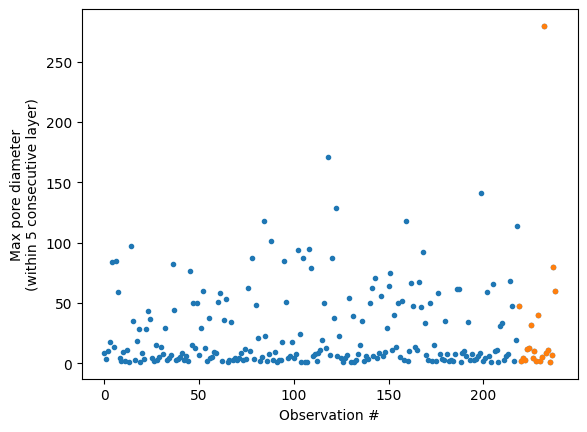

In [ ]:
test_indexes = np.arange(0,239)
train = y_shuffled[0:-1]
plt.plot(test_indexes,train,'.')

test_indexes = np.arange(219,239)
test = y_shuffled[-21:-1]
plt.plot(test_indexes,test,'.')

plt.xlabel('Observation #')
plt.ylabel('Max pore diameter\n(within 5 consecutive layer)')
plt.show()

In [ ]:
folds = 10
items_per_fold = int(len(y)/folds)

# Functions for different Models

In [ ]:
def get_classifier_model(X_train, classes_train):

  os.environ['PYTHONHASHSEED'] = '0'
  np.random.seed(0)
  rn.seed(12345)
  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  from keras import backend as K
  tf.random.set_seed(1234)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)

  classifier_model = models.Sequential([

      # =========================================================================================

      layers.SeparableConv2D(filters=2**5, kernel_size=2, padding = 'same', activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
      layers.MaxPooling2D(2),
      layers.BatchNormalization(),

      layers.SeparableConv2D(filters=2**4, kernel_size=2, padding = 'same', activation='relu'),
      layers.MaxPooling2D((2)),

      layers.SeparableConv2D(filters=2**3, kernel_size=2, padding = 'same', activation='relu'),
      layers.BatchNormalization(),

      # =========================================================================================

      # layers.SeparableConv2D(filters=16, kernel_size=2, padding = 'same', activation='relu', input_shape=(5, 30, 3)),
      # layers.BatchNormalization(),
      # layers.SeparableConv2D(filters=16, kernel_size=2, padding = 'same', activation='relu'),
      # layers.BatchNormalization(),
      # layers.MaxPooling2D(2),
      # layers.Dropout(0.25),

      # layers.SeparableConv2D(filters=32, kernel_size=2, padding = 'same', activation='relu'),
      # layers.BatchNormalization(),
      # layers.SeparableConv2D(filters=32, kernel_size=2, padding = 'same', activation='relu'),
      # layers.BatchNormalization(),
      # layers.MaxPooling2D(2),
      # layers.Dropout(0.25),

      layers.Flatten(),
      layers.Dense(2**6, activation='relu'),
      # layers.Dropout(0.5),
      layers.Dense(2**5, activation='relu'),
      # layers.Dropout(0.5),
      # layers.Dense(2**6, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      layers.Dense(int(np.max(classes_train)+1), activation='softmax')
  ])

  learning_rate = 0.0001
  classifier_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss='SparseCategoricalCrossentropy',
                metrics=['accuracy'])

  # X_train, X_val, classes_train, y_val = train_test_split(X_train, classes_train, test_size=0.2,
  #                                                   random_state=42, stratify=classes_train)
  # early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
  # classifier_training = classifier_model.fit(X_train, classes_train, epochs=500, batch_size=32, shuffle=True,
  #           validation_data=(X_val, y_val), callbacks = early_callbacks, verbose=0)

  # early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
  # classifier_training = classifier_model.fit(X_train, classes_train, epochs=500, batch_size=32, shuffle=True,
  #           validation_split = 0.1, callbacks = early_callbacks, verbose=0)

  early_callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=20)
  classifier_training = classifier_model.fit(X_train, classes_train, epochs=100, batch_size=16, shuffle=True, callbacks = early_callbacks, verbose=0)

  return classifier_model, classifier_training

def get_classificaion_results(classifier_model,X_test,classes_test):
  from sklearn.metrics import confusion_matrix , classification_report
  import numpy as np
  import seaborn as sn

  y_pred = classifier_model.predict(X_test)
  y_pred_classes = [np.argmax(element) for element in y_pred]

  cm = tf.math.confusion_matrix(labels=classes_test,predictions=y_pred_classes)
  plt.figure(figsize = (7,5))
  sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.xlabel('Predicted');
  plt.ylabel('Truth');

  print("Classification Report: \n", classification_report(classes_test, y_pred_classes))
  return classification_report(classes_test, y_pred_classes)

# Assign the class labels

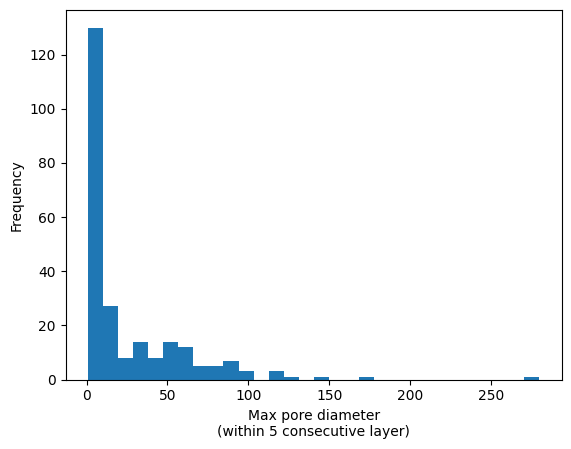

In [ ]:
plt.hist(y, bins=30)
plt.xlabel('Max pore diameter\n(within 5 consecutive layer)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
new_classes = np.ones(X_features_trimmed.shape[0])*-1
low_threshold = 5
medium_threshold = 25
low_pore_indexes = np.where(y<=low_threshold)[0]
medium_pore_indexes = np.where((y>low_threshold) & (y<=medium_threshold))[0]
large_pore_indexes = np.where(y>medium_threshold)[0]
new_classes[low_pore_indexes] = 0
new_classes[medium_pore_indexes] = 1
new_classes[large_pore_indexes] = 2

In [ ]:
np.where(new_classes==0)[0].shape, np.where(new_classes == 1)[0].shape, np.where(new_classes == 2)[0].shape

((77,), (84,), (79,))

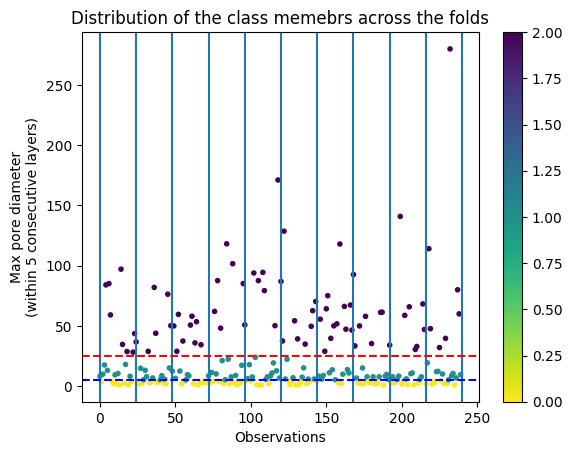

In [ ]:
plt.scatter(range(y_shuffled.shape[0]),y_shuffled,c=new_classes[indexes],marker = '.', cmap = 'viridis_r')
for i in np.arange(0,241,24):
  plt.axvline(i)

# plt.scatter(range(y.shape[0]),y,c=new_classes,marker = '.', cmap = 'viridis_r')
# for i in np.arange(0,241,20):
#   plt.axvline(i)

plt.axhline(low_threshold,color='blue', linestyle='--')
plt.axhline(medium_threshold,color='red', linestyle='--')
plt.colorbar()
plt.xlabel('Observations')
plt.ylabel('Max pore diameter\n(within 5 consecutive layers)')
plt.title('Distribution of the class memebrs across the folds')
plt.show()

# Classification Model: Thermal Feature based

Plot the training and testing data under different folds


 Fold: 1
Test indexes: [ 69 196 100 221  11  35  37 206 111 102  97  59  46 145  29  42 125 182
 210 146 118 162 191 218]


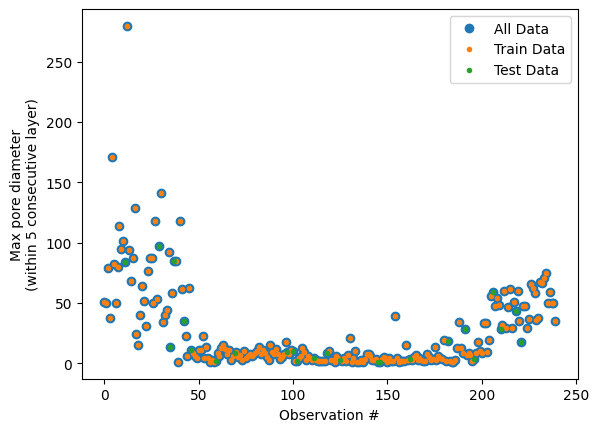


 Fold: 2
Test indexes: [225 167 183  18 121 148  54  65 213 168 132 194   5  33 112 147  86 197
 149 123 170  23 160  26]


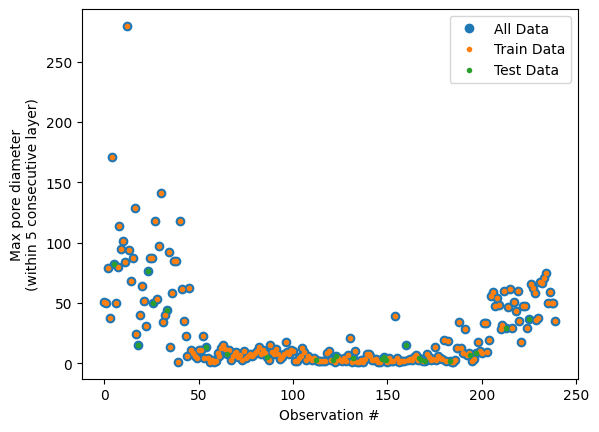


 Fold: 3
Test indexes: [189 238 129 216 212  62 126 230 127 164  89 200 217 228 157 229  28 150
 120 188 142 109 176  75]


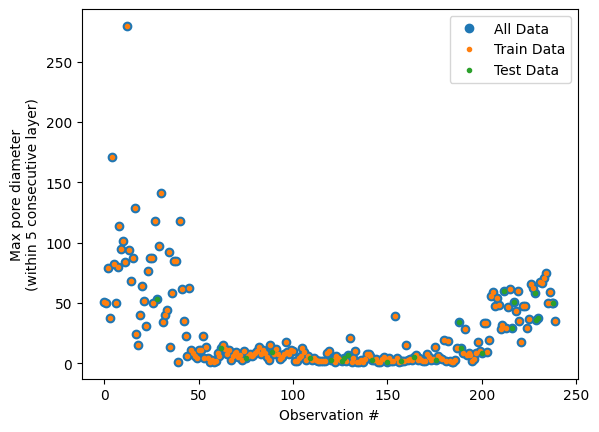


 Fold: 4
Test indexes: [190 166  64 144 227  81  24  93 209 130 113 172  40  52 169  77  10 143
 203 134  67 136 198  38]


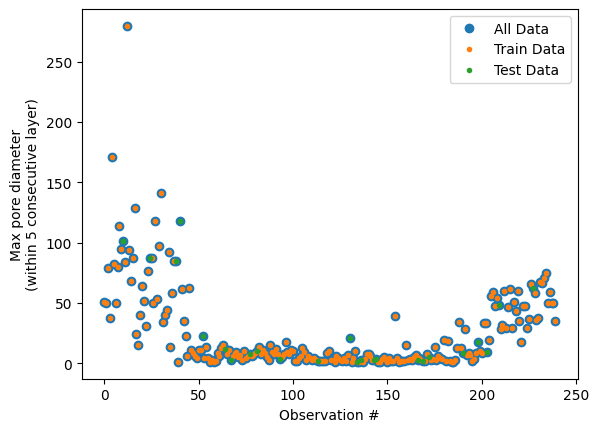


 Fold: 5
Test indexes: [  0  53  48  96 151 140  13  17  56  25  39 137   9   2 177  90 152  85
  66 204   6 105   4  79]


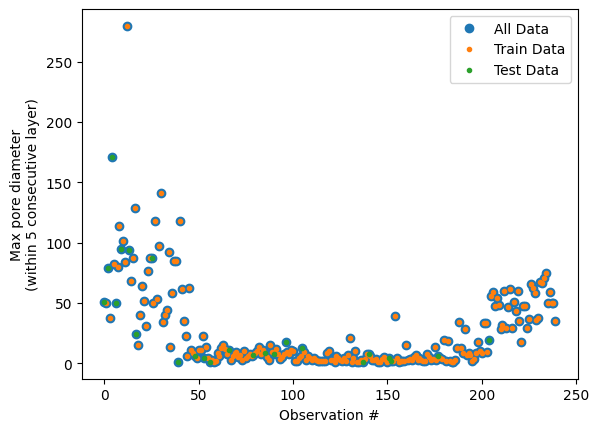


 Fold: 6
Test indexes: [ 15   3  16  68  43 155 185 103 192 208  58 154 122 107 139  88 220 116
  61 138 237  45  76 233]


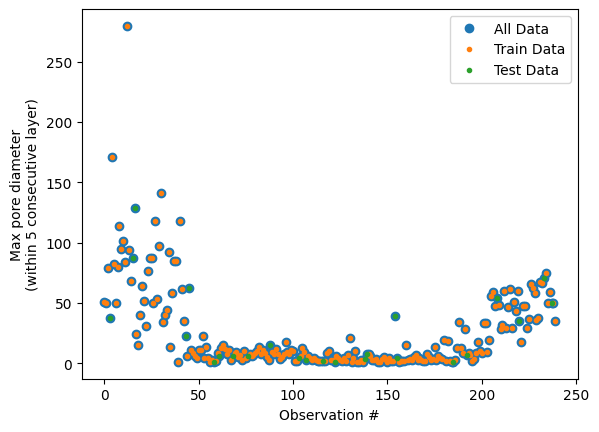


 Fold: 7
Test indexes: [124  47 205  78 106 224  20 234  51  32 175 235  94  21 173  27 115 119
 232 223  82  84 231 214]


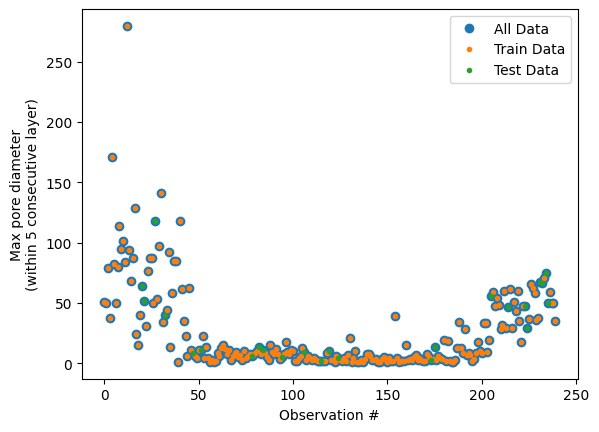


 Fold: 8
Test indexes: [ 34 201  72 161   1 128  63 101  36  83 179  57 239  98 153 110 117  95
 215  41 135  80 133 108]


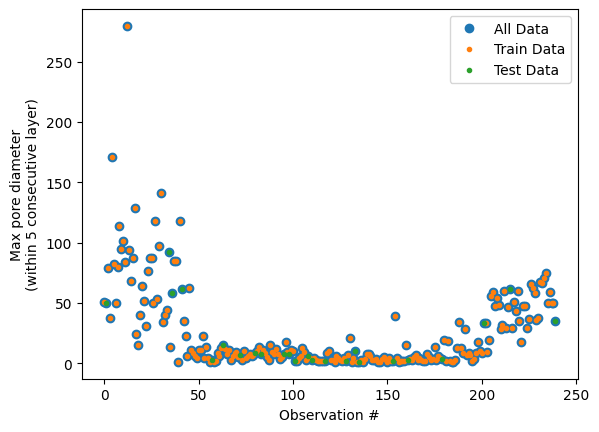


 Fold: 9
Test indexes: [ 31 163 171  87 174  44  60  30 195 178 236 141 156 226 199  99 131  22
 202 186 104  92  14 207]


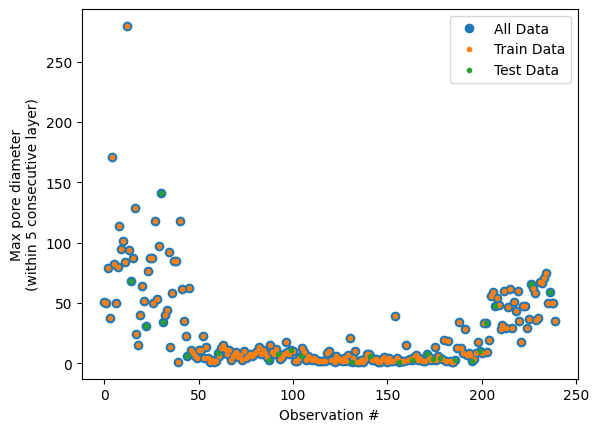


 Fold: 10
Test indexes: [158 180   8 222 181  49  73  91 187 211  55  74 159  19 114  71  12 193
  50 184 165   7 219  70]


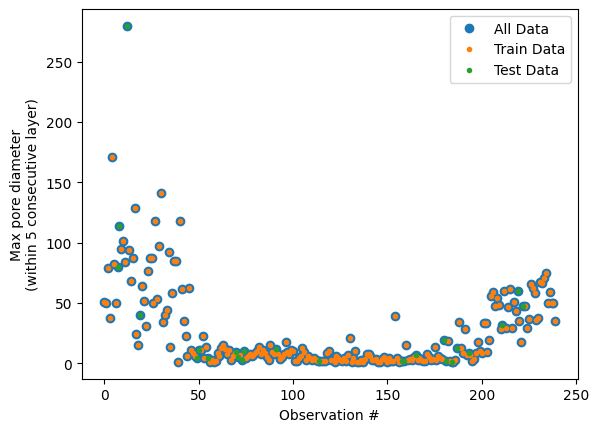

In [ ]:
train_indexes_list = list(train_indexes_dictionary.keys())
test_indexes_list = list(test_indexes_dictionary.keys())

for i in range(len(train_indexes_list)):

  print('\n Fold:',str(i+1))
  X_train = X_features_trimmed[train_indexes_dictionary[train_indexes_list[i]]]
  # y_train = y[train_indexes_dictionary[train_indexes_list[i]]]
  # classes_train = classes[train_indexes_dictionary[train_indexes_list[i]]]
  classes_train = new_classes[train_indexes_dictionary[train_indexes_list[i]]]

  X_test = X_features_trimmed[test_indexes_dictionary[test_indexes_list[i]]]
  # y_test = y[test_indexes_dictionary[test_indexes_list[i]]]
  # classes_test = classes[test_indexes_dictionary[test_indexes_list[i]]]
  classes_test = new_classes[test_indexes_dictionary[test_indexes_list[i]]]


  plt.plot(y,'o')

  train = y[train_indexes_dictionary[train_indexes_list[i]]]
  plt.plot(train_indexes_dictionary[train_indexes_list[i]],train,'.')

  test = y[test_indexes_dictionary[test_indexes_list[i]]]
  plt.plot(test_indexes_dictionary[test_indexes_list[i]],test,'.')
  print(f'Test indexes: {test_indexes_dictionary[test_indexes_list[i]]}')

  plt.legend(['All Data','Train Data','Test Data'])

  plt.xlabel('Observation #')
  plt.ylabel('Max pore diameter\n(within 5 consecutive layer)')
  plt.show()

Train the classifier


 Fold: 1


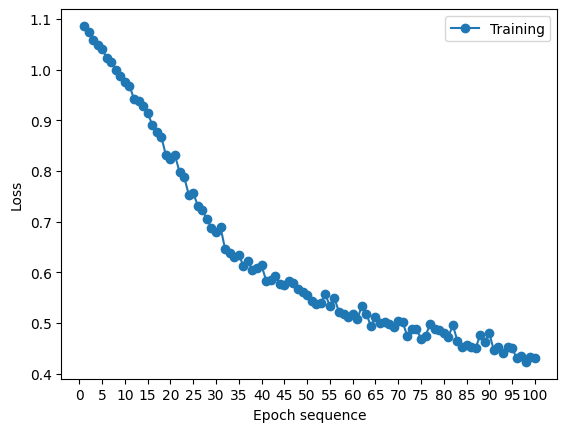

Testing Results
1/1 [==============================] - 0s 117ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.62      0.62      0.62         8
         1.0       0.29      0.25      0.27         8
         2.0       0.67      0.75      0.71         8

    accuracy                           0.54        24
   macro avg       0.53      0.54      0.53        24
weighted avg       0.53      0.54      0.53        24





 Fold: 2


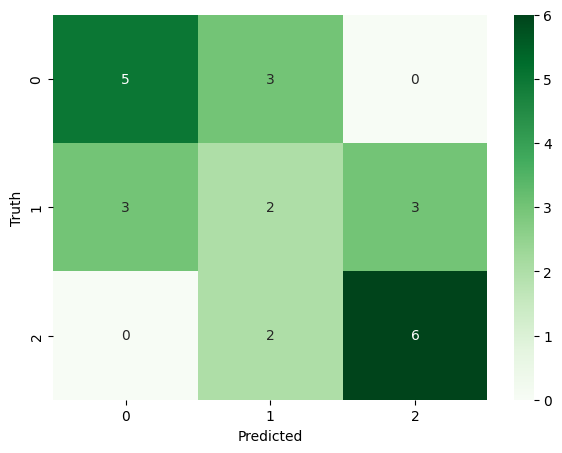

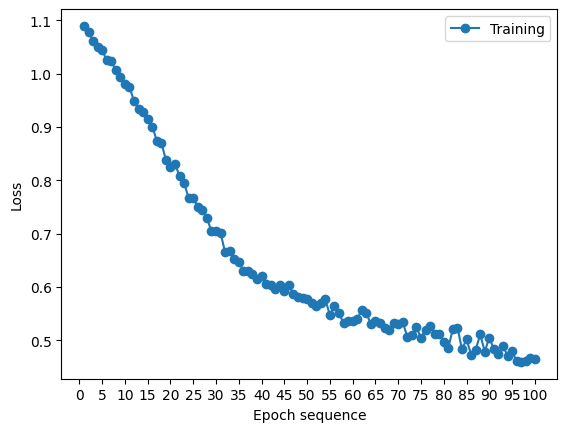

Testing Results
1/1 [==============================] - 0s 128ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         9
         1.0       1.00      0.56      0.71         9
         2.0       0.86      1.00      0.92         6

    accuracy                           0.83        24
   macro avg       0.87      0.85      0.83        24
weighted avg       0.87      0.83      0.82        24





 Fold: 3


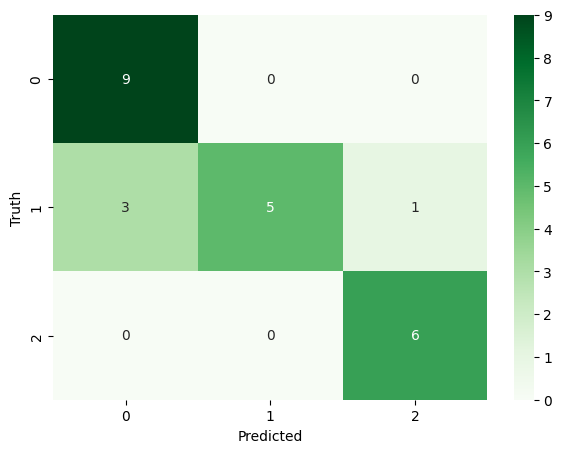

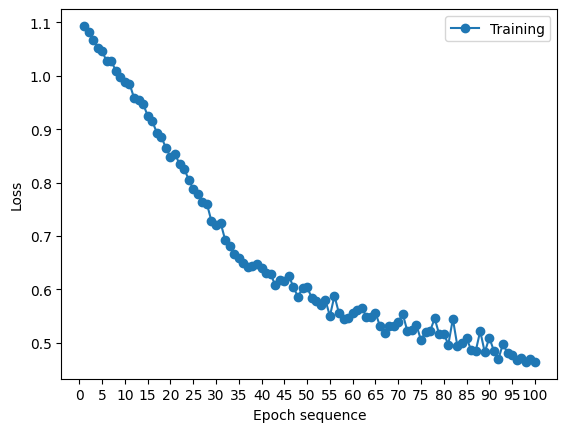

Testing Results
1/1 [==============================] - 0s 114ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84         9
         1.0       0.67      0.67      0.67         6
         2.0       1.00      0.89      0.94         9

    accuracy                           0.83        24
   macro avg       0.82      0.81      0.82        24
weighted avg       0.84      0.83      0.84        24





 Fold: 4


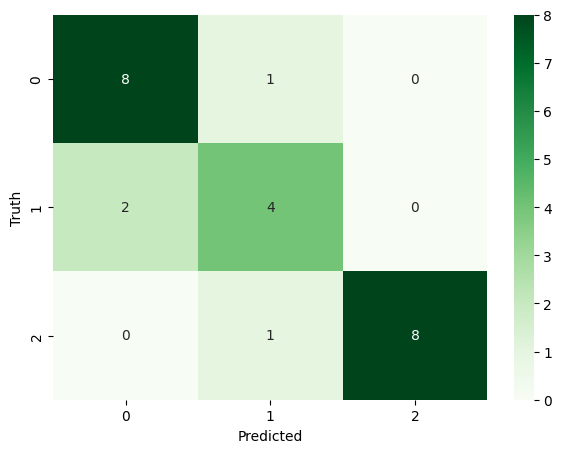

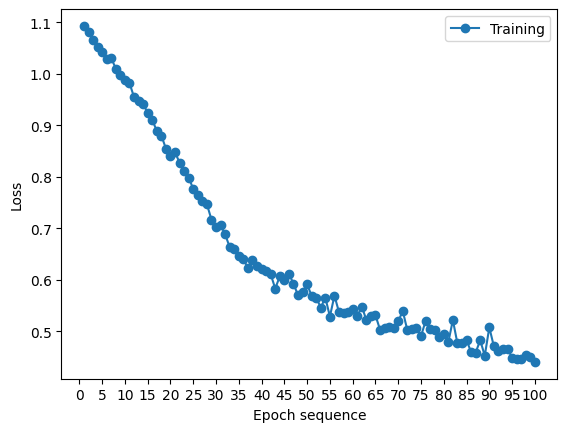

Testing Results
1/1 [==============================] - 0s 115ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.67      0.71         9
         1.0       0.60      0.67      0.63         9
         2.0       0.83      0.83      0.83         6

    accuracy                           0.71        24
   macro avg       0.73      0.72      0.72        24
weighted avg       0.71      0.71      0.71        24





 Fold: 5


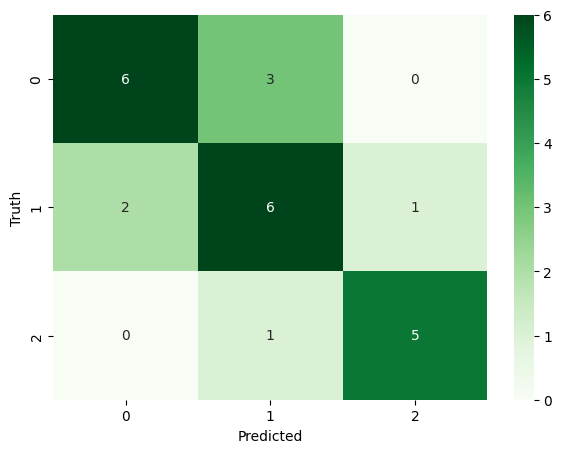

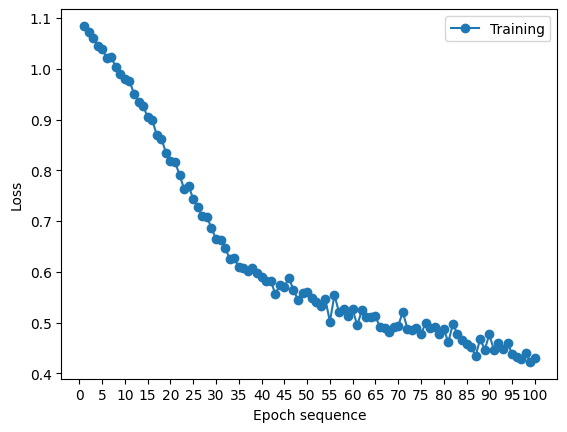

Testing Results
1/1 [==============================] - 0s 176ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         6
         1.0       0.83      0.45      0.59        11
         2.0       0.58      1.00      0.74         7

    accuracy                           0.62        24
   macro avg       0.64      0.65      0.61        24
weighted avg       0.68      0.62      0.61        24





 Fold: 6


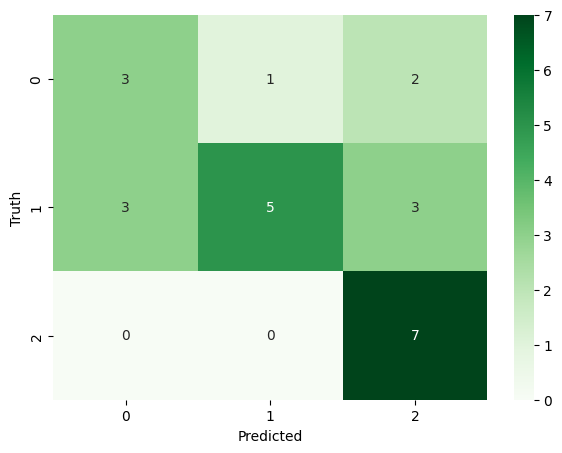

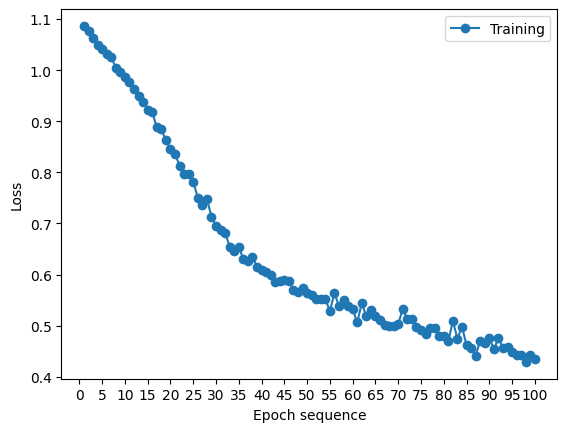

Testing Results
1/1 [==============================] - 0s 175ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         8
         1.0       0.67      0.86      0.75         7
         2.0       1.00      0.78      0.88         9

    accuracy                           0.79        24
   macro avg       0.81      0.79      0.79        24
weighted avg       0.82      0.79      0.80        24





 Fold: 7


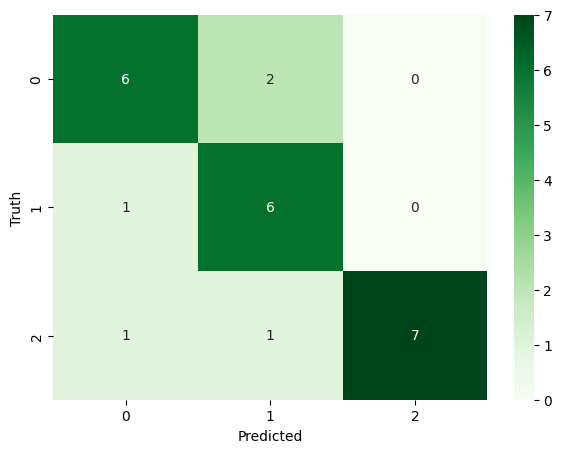

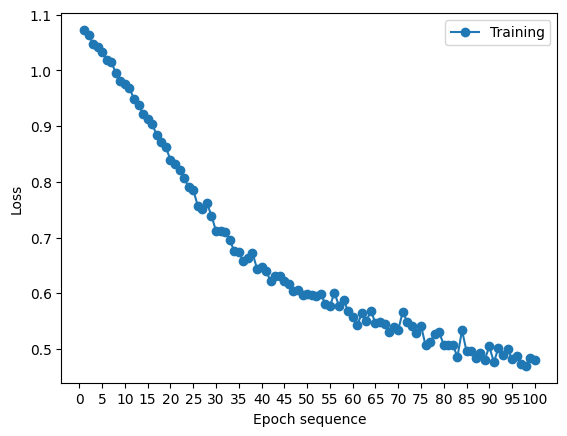

Testing Results
1/1 [==============================] - 0s 172ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.43      1.00      0.60         3
         1.0       1.00      0.56      0.71         9
         2.0       1.00      1.00      1.00        12

    accuracy                           0.83        24
   macro avg       0.81      0.85      0.77        24
weighted avg       0.93      0.83      0.84        24





 Fold: 8


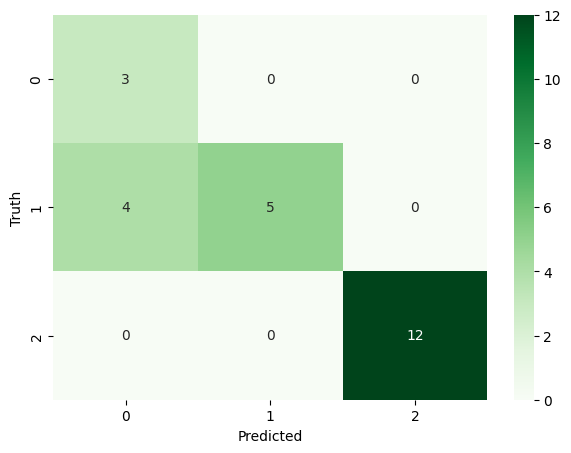

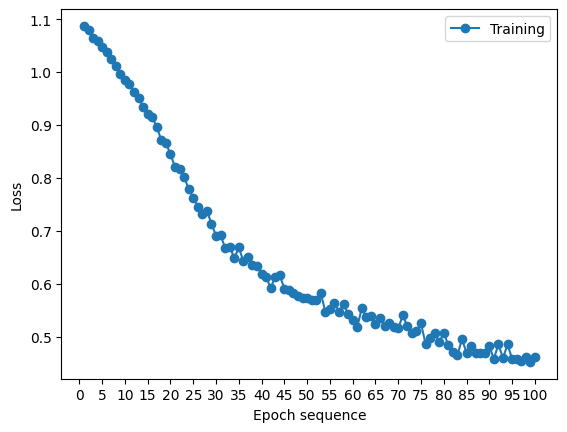

Testing Results
1/1 [==============================] - 0s 185ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.67      0.71         9
         1.0       0.55      0.75      0.63         8
         2.0       1.00      0.71      0.83         7

    accuracy                           0.71        24
   macro avg       0.77      0.71      0.72        24
weighted avg       0.75      0.71      0.72        24





 Fold: 9


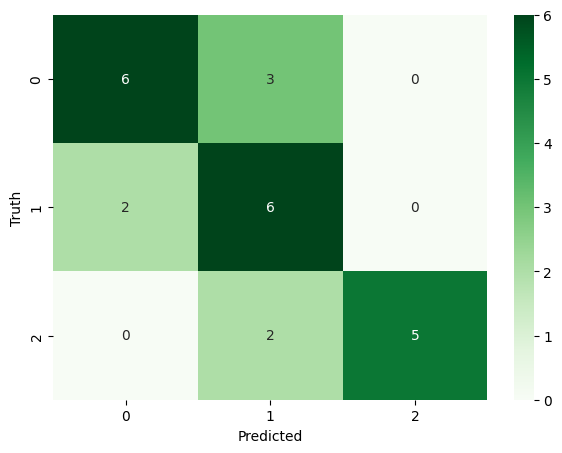

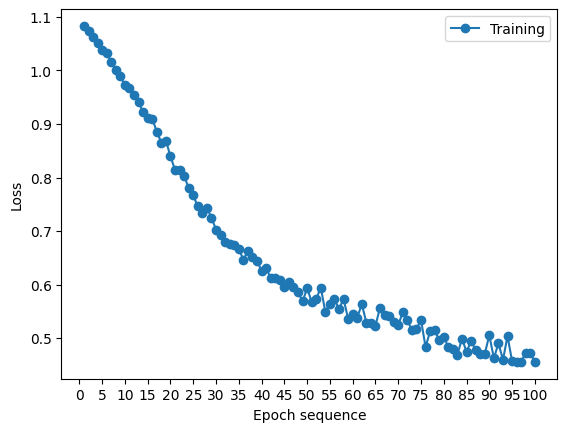

Testing Results
1/1 [==============================] - 0s 117ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.67      0.75      0.71         8
         1.0       0.57      0.50      0.53         8
         2.0       0.88      0.88      0.88         8

    accuracy                           0.71        24
   macro avg       0.70      0.71      0.70        24
weighted avg       0.70      0.71      0.70        24





 Fold: 10


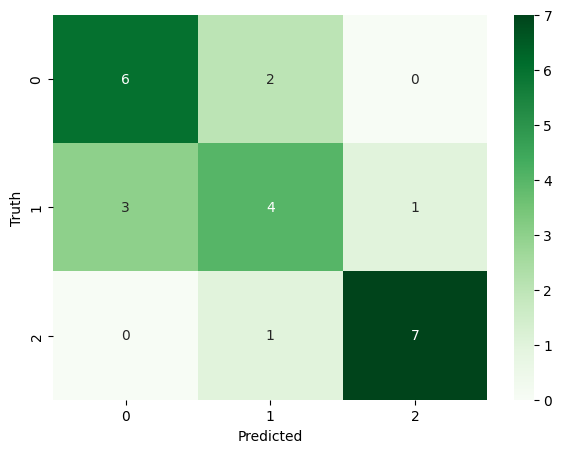

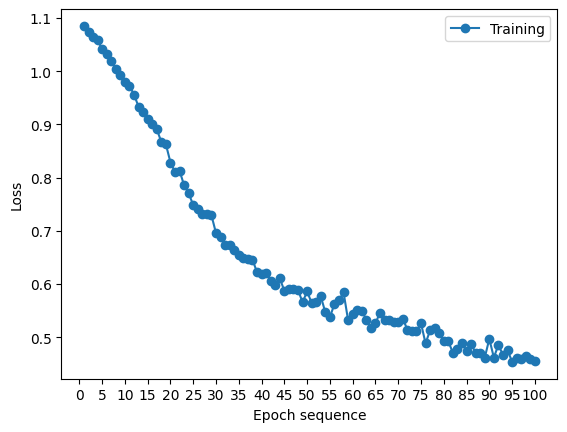

Testing Results
1/1 [==============================] - 0s 106ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.71      0.62      0.67         8
         1.0       0.67      0.67      0.67         9
         2.0       0.88      1.00      0.93         7

    accuracy                           0.75        24
   macro avg       0.75      0.76      0.76        24
weighted avg       0.74      0.75      0.74        24






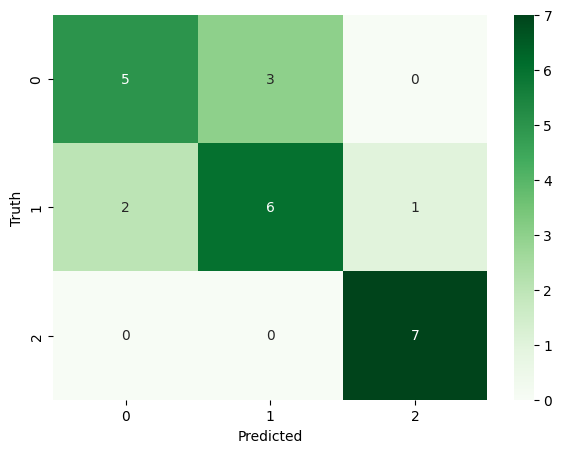

In [ ]:
train_indexes_list = list(train_indexes_dictionary.keys())
test_indexes_list = list(test_indexes_dictionary.keys())
result_list = []
train_f1score_list = []
train_stacked_array = np.zeros((0, 5))
test_stacked_array = np.zeros((0, 5))

for i in range(len(train_indexes_list)):

  print('\n Fold:',str(i+1))
  X_train = X_features_trimmed[train_indexes_dictionary[train_indexes_list[i]]]
  # y_train = y[train_indexes_dictionary[train_indexes_list[i]]]
  # classes_train = classes[train_indexes_dictionary[train_indexes_list[i]]]
  classes_train = new_classes[train_indexes_dictionary[train_indexes_list[i]]]

  X_test = X_features_trimmed[test_indexes_dictionary[test_indexes_list[i]]]
  # y_test = y[test_indexes_dictionary[test_indexes_list[i]]]
  # classes_test = classes[test_indexes_dictionary[test_indexes_list[i]]]
  classes_test = new_classes[test_indexes_dictionary[test_indexes_list[i]]]

  classifier_model, classifier_training = get_classifier_model(X_train, classes_train)
  plt.figure()
  plot_fitting_history(classifier_training)

  # print('Training Results\n=================')
  # train_classification_results = get_classificaion_results(classifier_model,X_train,classes_train)
  # train_classwise_results, train_f1score = classification_results(train_classification_results)
  # train_stacked_array = np.vstack((train_stacked_array,train_classwise_results))
  # train_f1score_list.append(train_f1score)

  print('Testing Results\n=================')
  test_classification_results = get_classificaion_results(classifier_model,X_test,classes_test)
  # test_classwise_results, test_f1score = classification_results(test_classification_results)
  test_classwise_results = classification_results(test_classification_results)

  test_stacked_array = np.vstack((test_stacked_array,test_classwise_results))
  # result_list.append(test_f1score)
  print('\n\n')

In [ ]:
df_test_results = pd.DataFrame(test_stacked_array, columns=['Class','Precision','Recall','f1score','support'])

stacked_items = np.zeros((0, 1))  # Initialize an empty array with 0 rows and n_cols columns
for i in range(10):
    stacked_items = np.vstack((stacked_items, i+1, i+1, i+1))

df_test_results["fold #"] = stacked_items
df_test_results

,Class,Precision,Recall,f1score,support,fold #
0,0.0,0.62,0.62,0.62,8.0,1.0
1,1.0,0.29,0.25,0.27,8.0,1.0
2,2.0,0.67,0.75,0.71,8.0,1.0
3,0.0,0.75,1.00,0.86,9.0,2.0
4,1.0,1.00,0.56,0.71,9.0,2.0
5,2.0,0.86,1.00,0.92,6.0,2.0
6,0.0,0.80,0.89,0.84,9.0,3.0
7,1.0,0.67,0.67,0.67,6.0,3.0
8,2.0,1.00,0.89,0.94,9.0,3.0
9,0.0,0.75,0.67,0.71,9.0,4.0


In [ ]:
filename = 'Thermal feature based results [5-25] thresholds_newFeatures V6.csv'
df_test_results.to_csv(filename, index=False)

# Result analysis

In [ ]:
df_TF = pd.read_csv(filename)

In [ ]:
df = df_TF[df_TF['Class']==0]
df['f1score'].mean()

0.697

In [ ]:
df = df_TF[df_TF['Class']==1]
df['f1score'].mean()

0.616

In [ ]:
df = df_TF[df_TF['Class']==2]
df['f1score'].mean()

0.866

In [ ]:
def plot_classwise_classification_results(class_label,result, filename):
  result_list = []
  for fold in range(folds):
    fold = fold + 1.
    df_fold = df_TF[df_TF['fold #']==fold]
    df = df_fold[df_fold['Class']==class_label]
    result_list.append(df[result].mean())
  # result_list
  avg_result = sum(result_list)/len(result_list)
  print(f'Average {result} score: {round(avg_result,4)}')
  plt.plot(np.arange(1,folds+1),result_list,'*-')
  plt.axhline(avg_result,color='red', linestyle='--')
  plt.xlabel('Fold #')
  plt.ylabel(result)
  plt.title(f'{result} values for Class {class_label}')
  plt.ylim([0,1.])
  plt.savefig(filename, dpi = 600)
  plt.show()

Average Recall score: 0.747


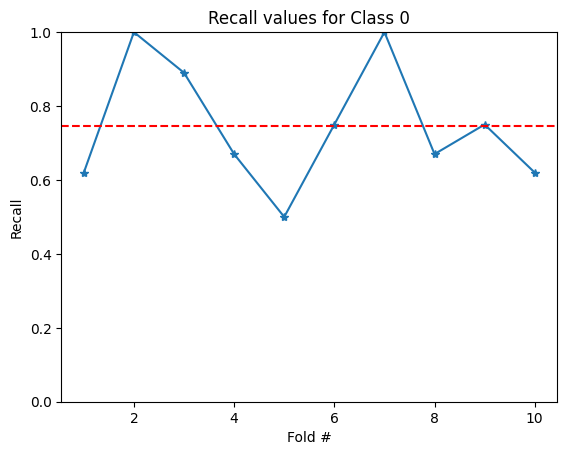

Average Recall score: 0.594


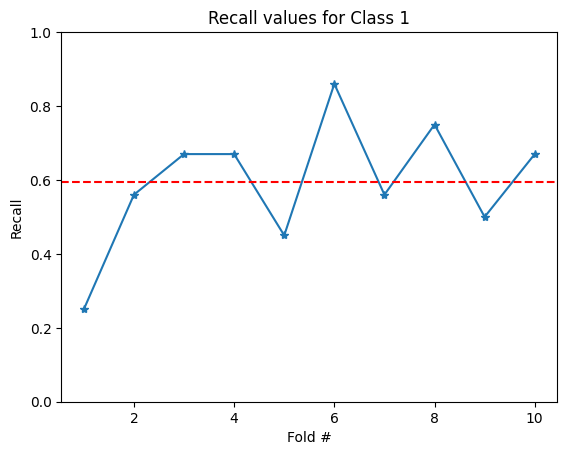

Average Recall score: 0.884


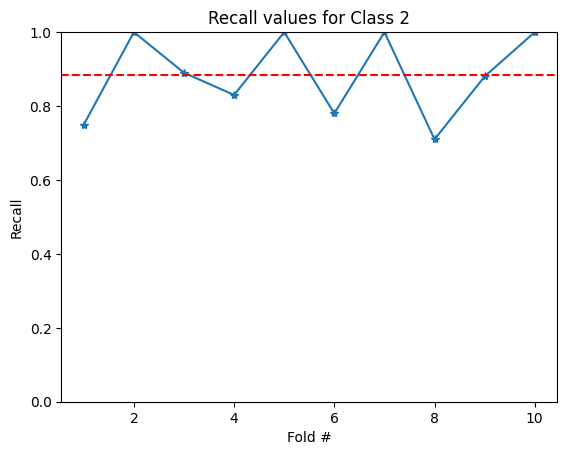

In [ ]:
result = 'Recall' # result: {'Precision','Recall','f1score'}
filename = result + ' plot for class 0 porosity level.png'
plot_classwise_classification_results(class_label = 0, result = result, filename = filename)
filename = result + ' plot for class 1 porosity level.png'
plot_classwise_classification_results(class_label = 1, result = result, filename = filename)
filename = result + ' plot for class 2 porosity level.png'
plot_classwise_classification_results(class_label = 2, result = result, filename = filename)

Average f1score score: 0.697


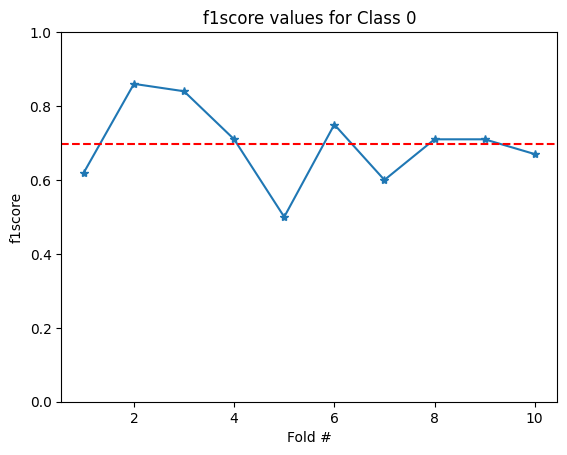

Average f1score score: 0.616


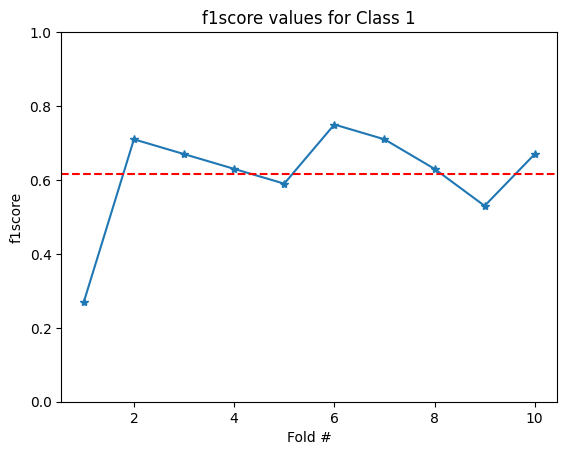

Average f1score score: 0.866


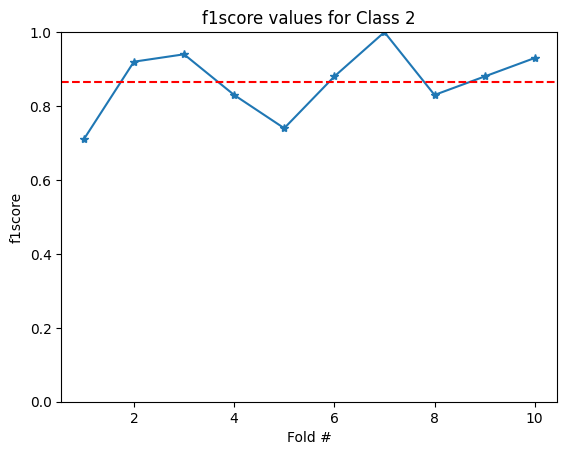

In [ ]:
result = 'f1score' # result: {'Precision','Recall','f1score'}
filename = result + ' plot for class 0 porosity level.png'
plot_classwise_classification_results(class_label = 0, result = result, filename = filename)
filename = result + ' plot for class 1 porosity level.png'
plot_classwise_classification_results(class_label = 1, result = result, filename = filename)
filename = result + ' plot for class 2 porosity level.png'
plot_classwise_classification_results(class_label = 2, result = result, filename = filename)

**Plot mean results (e.g., f1-score)**

In [ ]:
result_list = []
for fold in range(10):
  fold = fold + 1.
  df = df_TF[df_TF['fold #']==fold]
  result_list.append(df['f1score'].mean())
# result_list

Average f1 score: 0.7263


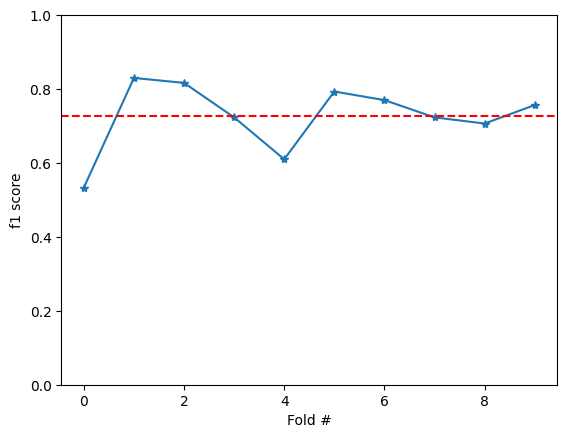

In [ ]:
avg_f1score = sum(result_list)/len(result_list)
print(f'Average f1 score: {round(avg_f1score,4)}')
plt.plot(result_list,'*-')
plt.axhline(avg_f1score,color='red', linestyle='--')
plt.xlabel('Fold #')
plt.ylabel('f1 score')
plt.ylim([0,1.])
plt.show()

# Code for compressing the data

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Generate some example 3D data
original_data = np.random.normal(loc=0.0, scale=1.0, size=(240, 5, 30, 65))

# Assuming your original data is stored in 'original_data' with shape (240, 5, 30, 65)

# Reshape the original data to a 2D array (240, 5*30*65)
reshaped_data = original_data.reshape(original_data.shape[0], -1)

# Perform PCA with the desired number of components (e.g., 30)
n_components = 30
pca = PCA(n_components=n_components)
compressed_data = pca.fit_transform(reshaped_data)

# Reconstruct the original data from the compressed data
reconstructed_data = pca.inverse_transform(compressed_data)
reconstructed_data = reconstructed_data.reshape(original_data.shape)

# Evaluate the explained variance ratio to assess information loss
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_ratio = np.sum(explained_variance_ratio)

# Print the explained variance ratio and total variance ratio
print("Explained variance ratio for each component:")
print(explained_variance_ratio)
print("Total variance ratio:", total_variance_ratio)

Explained variance ratio for each component:
[0.00531239 0.00525264 0.00521632 0.00517969 0.00515467 0.00513547
 0.00512234 0.00510207 0.00508373 0.00505701 0.00502369 0.00497949
 0.00495743 0.00493481 0.00492053 0.00487803 0.00485605 0.00484968
 0.00481799 0.0048006  0.00477449 0.00475071 0.00471802 0.00469995
 0.00469043 0.0046723  0.00464764 0.00463141 0.00459126 0.00455929]
Total variance ratio: 0.14737012700999655


# Classification Model: Thermal History based

In [ ]:
# train_indexes_list = list(train_indexes_dictionary.keys())
# test_indexes_list = list(test_indexes_dictionary.keys())
# test_f1score_list_TH = []
# train_f1score_list = []
# train_stacked_array = np.zeros((0, 5))
# test_stacked_array = np.zeros((0, 5))

# for i in range(len(train_indexes_list)):

#   print('\nRound:',str(i+1))
#   X_train = X_profiles[train_indexes_dictionary[train_indexes_list[i]]]
#   y_train = y[train_indexes_dictionary[train_indexes_list[i]]]
#   # classes_train = classes[train_indexes_dictionary[train_indexes_list[i]]]
#   classes_train = new_classes[train_indexes_dictionary[train_indexes_list[i]]]

#   X_test = X_profiles[test_indexes_dictionary[test_indexes_list[i]]]
#   y_test = y[test_indexes_dictionary[test_indexes_list[i]]]
#   # classes_test = classes[test_indexes_dictionary[test_indexes_list[i]]]
#   classes_test = new_classes[test_indexes_dictionary[test_indexes_list[i]]]

#   classifier_model, classifier_training = get_classifier_model(X_train, classes_train)
#   plt.figure()
#   plot_fitting_history(classifier_training)

#   # print('Training Results\n=================')
#   # train_classification_results = get_classificaion_results(classifier_model,X_train,classes_train)
#   # train_classwise_results, train_f1score = classification_results(train_classification_results)
#   # train_stacked_array = np.vstack((train_stacked_array,train_classwise_results))
#   # train_f1score_list.append(train_f1score)

#   print('Testing Results\n=================')
#   test_classification_results = get_classificaion_results(classifier_model,X_test,classes_test)
#   test_classwise_results, test_f1score = classification_results(test_classification_results)
#   test_stacked_array = np.vstack((test_stacked_array,test_classwise_results))
#   test_f1score_list_TH.append(test_f1score)
#   print('\n\n')

In [ ]:
# df_test_results_TH = pd.DataFrame(test_stacked_array, columns=['class','Precision','Recall','f1-score','support'])

# stacked_items = np.zeros((0, 1))  # Initialize an empty array with 0 rows and n_cols columns
# for i in range(10):
#     stacked_items = np.vstack((stacked_items, i+1, i+1, i+1))

# df_test_results_TH["fold #"] = stacked_items
# df_test_results_TH

In [ ]:
# df_test_results_TH.to_csv('Thermal history based results [10-80] thresholds.csv', index=False)

In [ ]:
# avg_f1score = sum(test_f1score_list_TH)/len(test_f1score_list_TH)
# print(f'Average f1 score: {round(avg_f1score,4)}')
# plt.plot(test_f1score_list_TH,'*-')
# plt.axhline(avg_f1score,color='red', linestyle='--')
# plt.xlabel('Fold #')
# plt.ylabel('f1 score')
# plt.show()

In [ ]:
# df_TH = pd.read_csv('Thermal history based results [10-80] thresholds.csv')

# Implementation of Paulson (2020) Paper

In [ ]:
# !pip install deap

In [ ]:
# import random
# from deap import creator, base, tools, algorithms

# # Define the problem to be solved
# # X is the input data, y is the output data
# X = X_profiles  # Input data
# y = y  # Output data

# # # Define the evaluation function
# # def evaluate_fitness(individual):
# #     # individual is a list of 0's and 1's representing the selected features
# #     # Convert individual to a list of selected features
# #     selected_features = [i for i, x in enumerate(individual) if x == 1]
# #     # Use selected_features as input for a machine learning model
# #     # and calculate the fitness score based on how well the model performs
# #     # return the fitness score as a tuple
# #     return (fitness_score,)

# def evaluate_fitness(individual):
#     # assume X is a numpy array containing the original feature set
#     selected_features = [i for i, x in enumerate(individual) if x == 1]
#     X_selected = X[:, selected_features]

#     # assume y is a numpy array containing the target variable
#     # assume clf is a scikit-learn classifier (e.g., LogisticRegression, RandomForestClassifier, etc.)
#     print(X_selected.shape)
#     classifier_model.fit(X_selected, y)
#     accuracy = classifier_model.score(X_selected, y)

#     # maximize accuracy, so negate it to minimize fitness
#     fitness = -accuracy
#     fitness_score = fitness
#     return (fitness_score,)

# # Define the genetic algorithm parameters
# POPULATION_SIZE = 50
# P_CROSSOVER = 0.9
# P_MUTATION = 0.1
# MAX_GENERATIONS = 100
# HALL_OF_FAME_SIZE = 10

# # Define the fitness function and the individual creator
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

# # Define the toolbox and register the necessary functions
# toolbox = base.Toolbox()
# toolbox.register("attr_bool", random.randint, 0, 1)
# toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X[0]))
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# toolbox.register("evaluate", evaluate_fitness)
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# toolbox.register("select", tools.selTournament, tournsize=3)

# # Run the genetic algorithm
# population = toolbox.population(n=POPULATION_SIZE)
# hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("max", max)

# for generation in range(MAX_GENERATIONS):
#     offspring = algorithms.varAnd(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION)
#     fits = toolbox.map(toolbox.evaluate, offspring)
#     for fit, ind in zip(fits, offspring):
#         ind.fitness.values = fit
#     population = toolbox.select(offspring, k=len(population))
#     hof.update(population)
#     record = stats.compile(population)
#     print("Generation ", generation, ":", record)

# # Print the best individual and its fitness score
# best_individual = hof[0]
# print("Best individual: ", best_individual)
# print("Fitness score: ", best_individual.fitness.values[0])